In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_pickle("data.pkl")

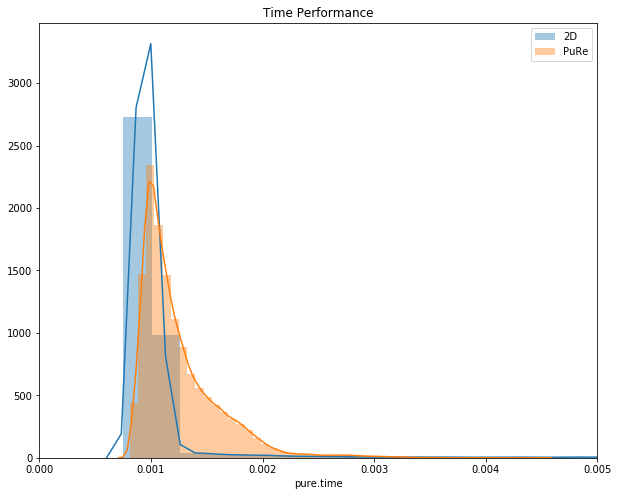

In [3]:
plt.figure(figsize=(10, 8))
plt.title("Time Performance")
sns.distplot(data["2d.time"], label="2D")
sns.distplot(data["pure.time"], label="PuRe")
plt.xlim(0, 0.005)
plt.legend()

In [4]:
data["2d.error"] = np.sqrt((data["2d.center_x"] - data["target_x"])**2 + (data["2d.center_y"] - data["target_y"])**2)
data["pure.error"] = np.sqrt((data["pure.center_x"] - data["target_x"])**2 + (data["pure.center_y"] - data["target_y"])**2)

(0, 30)

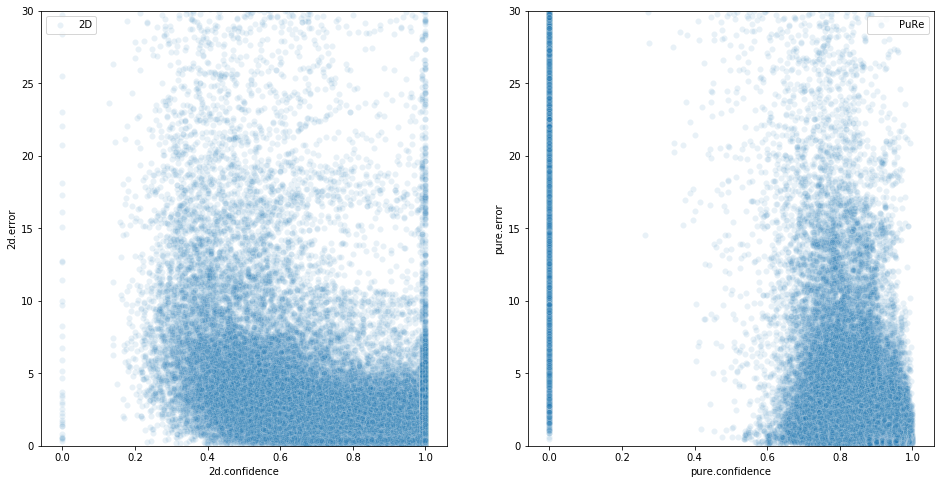

In [27]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(data=data[data["2d.error"] < 1000], x="2d.confidence", y="2d.error", label="2D", alpha=0.1, ax=axes[0])
axes[0].set_ylim(0, 30)
sns.scatterplot(data=data, x="pure.confidence", y="pure.error", label="PuRe", alpha=0.1, ax=axes[1])
axes[1].set_ylim(0, 30)

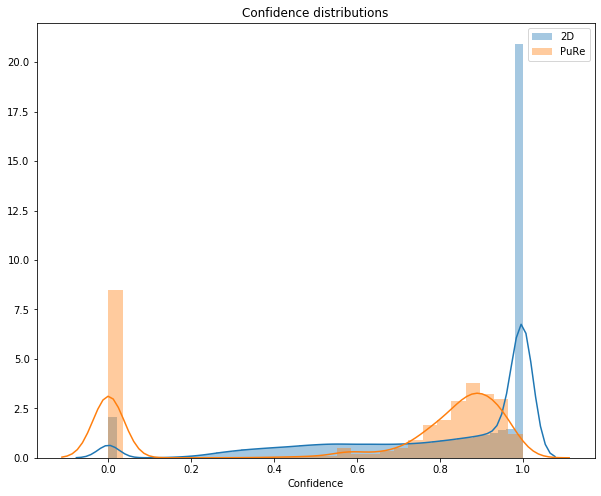

In [13]:
plt.figure(figsize=(10, 8))
plt.title("Confidence distributions")
sns.distplot(data["2d.confidence"], label="2D")
sns.distplot(data["pure.confidence"], label="PuRe")
plt.xlabel("Confidence")
plt.legend()

In [24]:
len(data[data["pure.confidence"] == 0]) / len(data)

0.29205386073240813

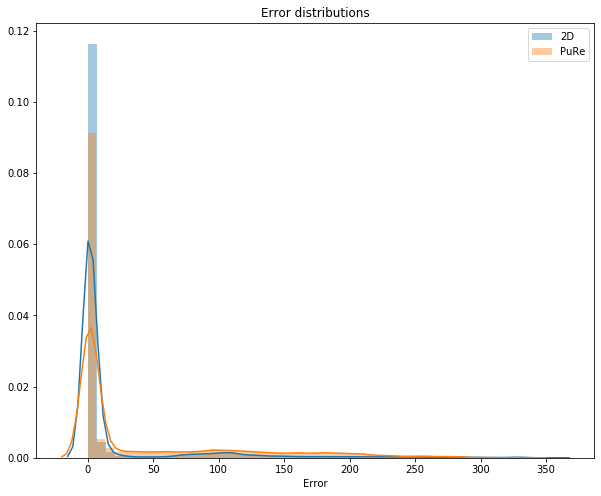

In [14]:
plt.figure(figsize=(10, 8))
plt.title("Error distributions")
sns.distplot(data["2d.error"], label="2D")
sns.distplot(data["pure.error"], label="PuRe")
plt.xlabel("Error")
plt.legend()

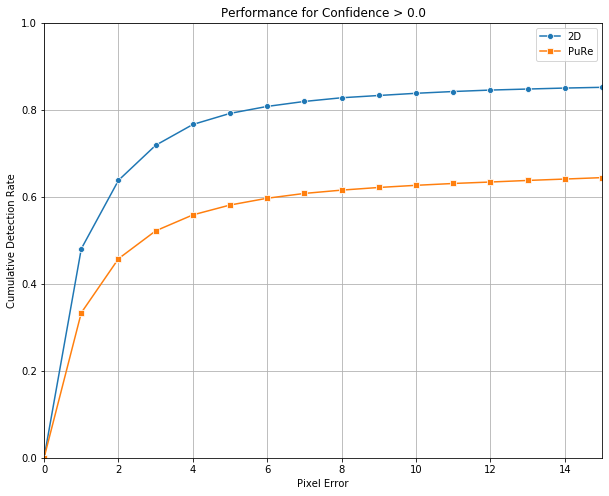

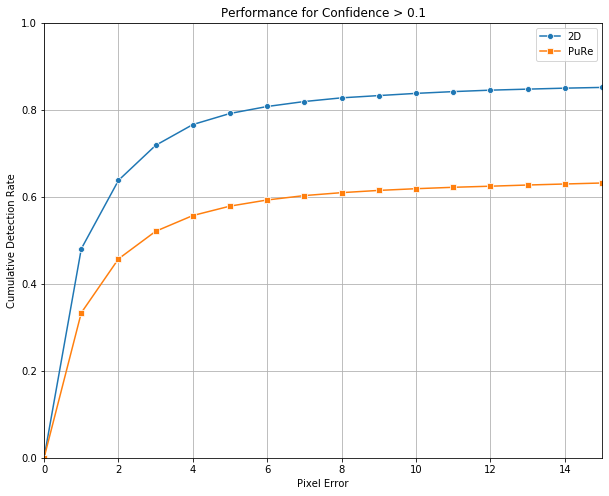

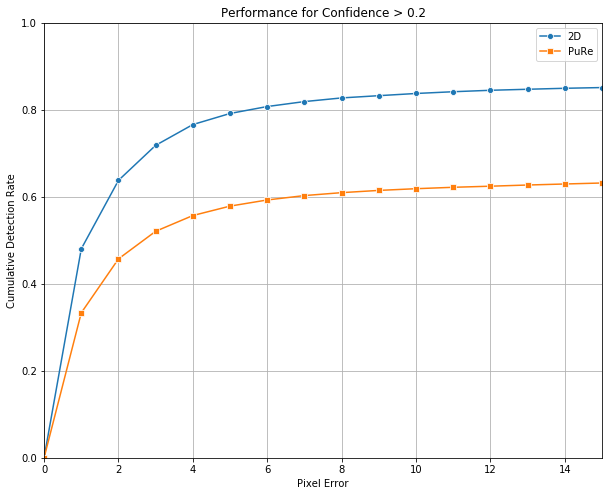

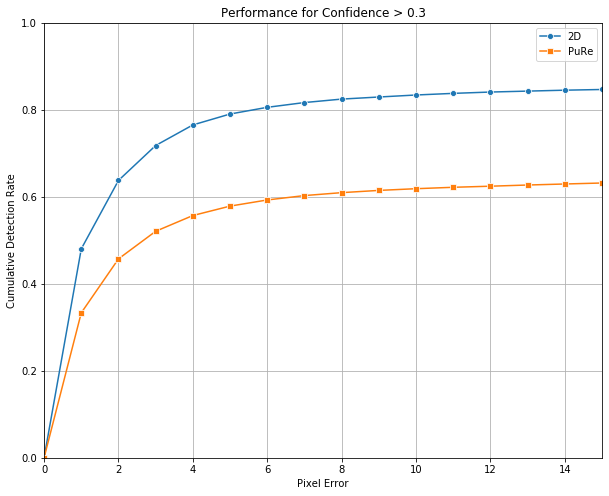

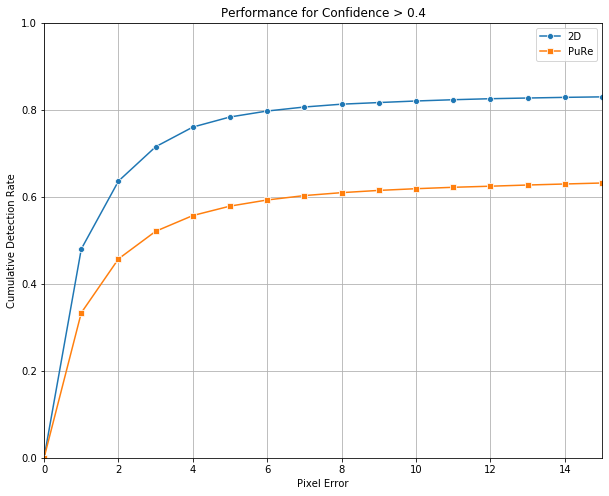

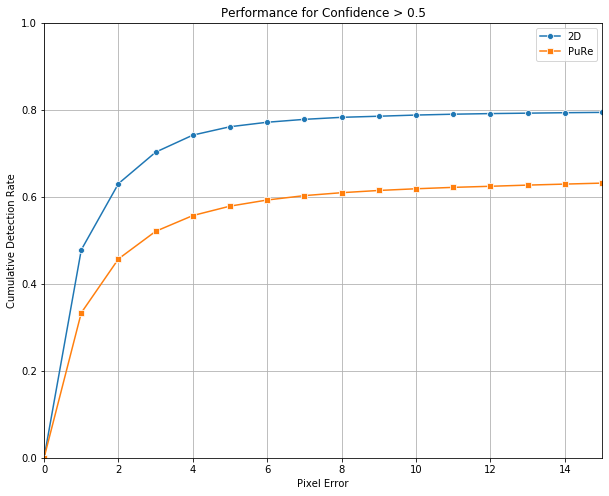

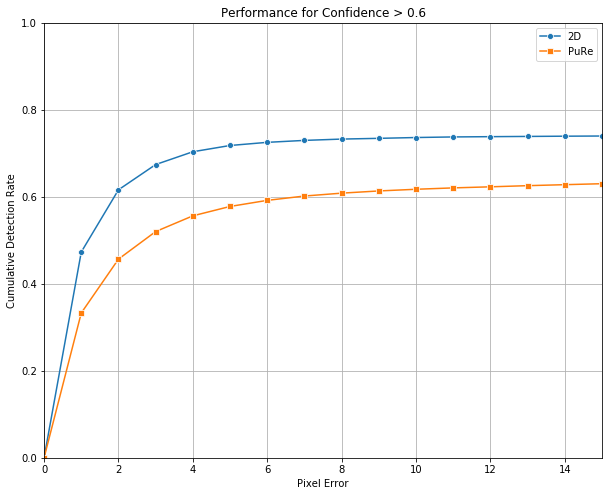

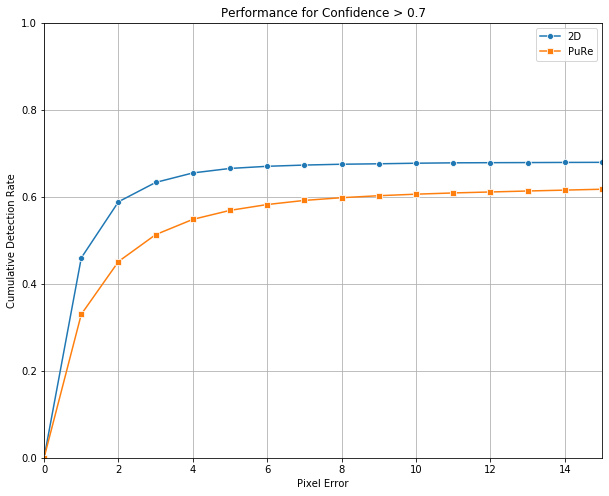

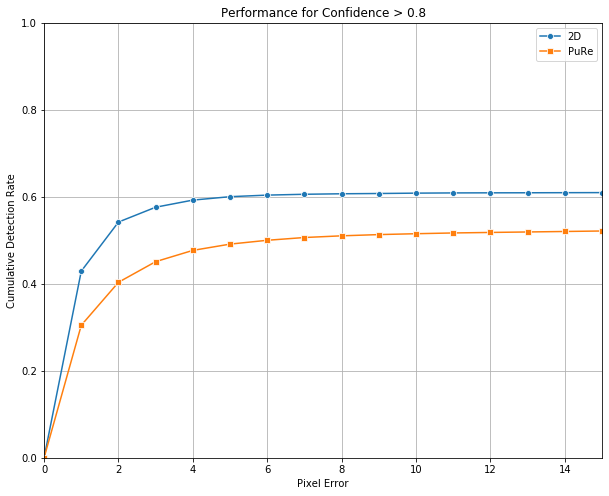

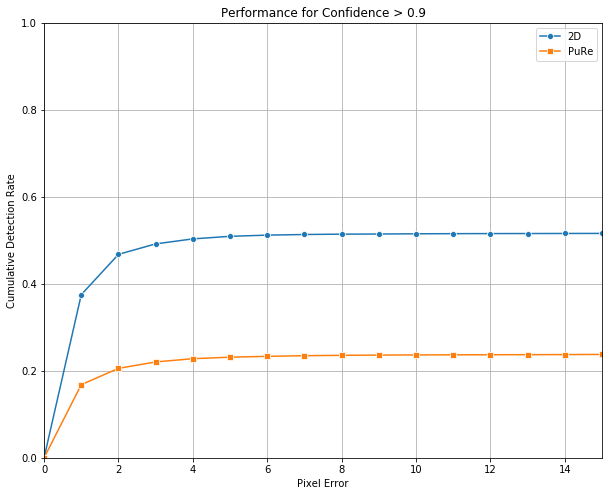

In [16]:
max_err = 16
for conf in np.arange(0, 1, 0.1):
    errors_2d = data.loc[data["2d.confidence"] >= conf, "2d.error"]
    errors_2d_cum = errors_2d.groupby(pd.cut(errors_2d, bins=range(-1, max_err))).count().cumsum() / len(data)
    errors_pure = data.loc[data["pure.confidence"] >= conf,"pure.error"]
    errors_pure_cum = errors_pure.groupby(pd.cut(errors_pure, bins=range(-1, max_err))).count().cumsum() / len(data)

    errors_2d_cum = errors_2d_cum.rename(columns=str).reset_index()[0]
    errors_pure_cum = errors_pure_cum.rename(columns=str).reset_index()[0]

    plt.figure(figsize=(10, 8))
    plt.title(f"Performance for Confidence > {conf:.1f}")
    sns.lineplot(data=errors_2d_cum, label="2D", marker="o")
    sns.lineplot(data=errors_pure_cum, label="PuRe", marker="s")
    plt.xlabel("Pixel Error")
    plt.ylabel("Cumulative Detection Rate")
    plt.xlim(0, max_err-1)
    plt.ylim(0, 1)
    plt.grid()